In [1]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import cohen_kappa_score

In [2]:
SQLITE_DB = "../results/db.db"

METRIC = cohen_kappa_score

In [3]:
with sqlite3.connect(SQLITE_DB) as conn:
    results_df = pd.read_sql("SELECT * FROM results", conn)

In [4]:
results_df.head()

,experiment_id,cross_validation_iteration,targets,predictions,id_code
0,b4d91450-2736-4014-b46f-769b42a251d5,1,0,0,c6f5b5b5be41
1,b4d91450-2736-4014-b46f-769b42a251d5,1,0,0,d2cd47ed2c1d
2,b4d91450-2736-4014-b46f-769b42a251d5,1,0,0,5bea250d8bf5
3,b4d91450-2736-4014-b46f-769b42a251d5,1,2,2,09eeafa9656a
4,b4d91450-2736-4014-b46f-769b42a251d5,1,2,2,d29096bd94aa


In [7]:
def calculate_metric(group, metric):
    return metric(group["targets"], group["predictions"])

metrics_df = results_df.groupby(by=["experiment_id", "cross_validation_iteration"]).apply(calculate_metric, METRIC)
metrics_df = metrics_df.groupby(by="experiment_id").describe()
metrics_df

,count,mean,std,min,25%,50%,75%,max
experiment_id,,,,,,,,
0cc8a235-56e2-48eb-9597-5814438ba816,3.0,0.507347,0.011749,0.493835,0.503444,0.513054,0.514103,0.515152
b4d91450-2736-4014-b46f-769b42a251d5,3.0,0.536986,0.005124,0.532541,0.534184,0.535826,0.539209,0.542591


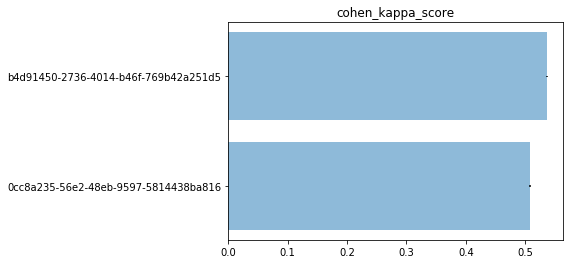

In [8]:
plt.barh(
    width=metrics_df["mean"],
    y=metrics_df.index,
    yerr=metrics_df["std"],
    alpha=0.5,
    ecolor='black',
)
plt.title(f"{METRIC.__name__}")
_ = plt.plot()